In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import  rcParams

rcParams['figure.figsize'] = 10,6

In [2]:
tb_dataset = pd.read_csv("tb_dataset_india.csv")
tb_dataset

,Unnamed: 0,Dates,Cases
0,0,01/01/2017,24515
1,1,08/01/2017,27890
2,2,15/01/2017,34004
3,3,22/01/2017,35059
4,4,29/01/2017,40281
...,...,...,...
257,257,05/12/2021,40440
258,258,12/12/2021,39902
259,259,19/12/2021,34156
260,260,26/12/2021,32172


In [3]:
tb_dataset.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [4]:
tb_dataset['Dates'] = pd.to_datetime(tb_dataset['Dates'],infer_datetime_format=True)
indexedDataset = tb_dataset.set_index(['Dates'])

In [5]:
from datetime import datetime
indexedDataset.head(37)

,Cases
Dates,
2017-01-01,24515
2017-08-01,27890
2017-01-15,34004
2017-01-22,35059
2017-01-29,40281
2017-05-02,31964
2017-12-02,35725
2017-02-19,36991
2017-02-26,44414


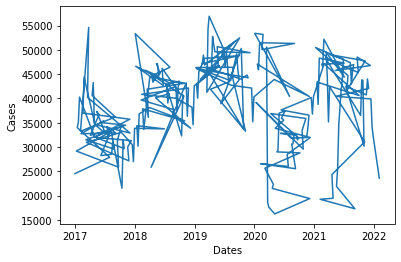

In [8]:
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.plot(indexedDataset)

In [9]:
rolmean = indexedDataset.rolling(window=51).mean()
rolstd = indexedDataset.rolling(window=51).std()
print(rolmean,rolstd)

                   Cases
Dates                   
2017-01-01           NaN
2017-08-01           NaN
2017-01-15           NaN
2017-01-22           NaN
2017-01-29           NaN
...                  ...
2021-05-12  40873.745098
2021-12-12  40934.862745
2021-12-19  40811.196078
2021-12-26  40518.098039
2022-02-01  40184.823529

[262 rows x 1 columns]                   Cases
Dates                  
2017-01-01          NaN
2017-08-01          NaN
2017-01-15          NaN
2017-01-22          NaN
2017-01-29          NaN
...                 ...
2021-05-12  8642.070738
2021-12-12  8623.578468
2021-12-19  8675.546830
2021-12-26  8710.578755
2022-02-01  9026.840282

[262 rows x 1 columns]


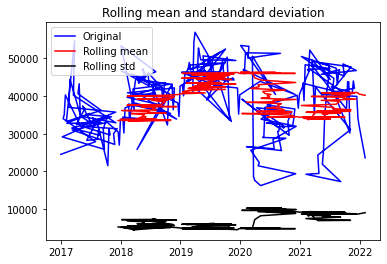

In [10]:
orig = plt.plot(indexedDataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
mean = plt.plot(rolstd, color = 'black', label = 'Rolling std')

plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block = False)

In [11]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test: ")
dftest = adfuller(indexedDataset['Cases'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observation Used'])

for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey-Fuller Test: 
Test Statistic                 -3.515477
p-value                         0.007598
#Lags Used                      7.000000
Number of Observation Used    254.000000
Critical Value (1%)            -3.456360
Critical Value (5%)            -2.872987
Critical Value (10%)           -2.572870
dtype: float64


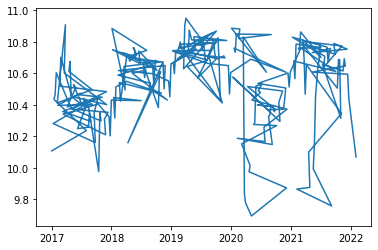

In [12]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale.iloc[0:262])